# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [2]:
import pandas as pd
%matplotlib inline

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the "correct" name. You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*.

In [3]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [4]:
df.shape

(1653, 30)

In [5]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [7]:
df[['name', 'networthusbillion']].sort_values('networthusbillion', ascending=False)[:10]

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4) How many male billionaires are there compared to the number of female billionares? Do they have a different average wealth?

> **TIP:** The second part uses `groupby`, but the first part does not.

In [8]:
df['gender'].value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [9]:
df.groupby('gender')['networthusbillion'].mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) Who is the poorest billionaire? Who are the top 10 poorest billionaires?

In [11]:
df[['name', 'networthusbillion']].sort_values('networthusbillion')[:1]

,name,networthusbillion
156,B.R. Shetty,1.0


In [12]:
df[['name', 'networthusbillion']].sort_values('networthusbillion')[:10]

,name,networthusbillion
156,B.R. Shetty,1.0
1310,Rostam Azizi,1.0
1497,Tory Burch,1.0
476,Fred Chang,1.0
115,Angela Bennett,1.0
485,Fu Kwan,1.0
1318,Ryan Kavanaugh,1.0
1133,O. Francis Biondi,1.0
859,Lam Fong Ngo,1.0
456,Feng Hailiang,1.0


## 6) What is the most common source of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???

In [13]:
(df[['name', 'typeofwealth']]
 .groupby('typeofwealth')
 .count()
 .sort_values('name', ascending=False))

,name
typeofwealth,
inherited,506
founder non-finance,467
self-made finance,344
privatized and resources,192
executive,142


In [25]:
(df[['name', 'gender', 'typeofwealth']]
 .groupby(['typeofwealth', 'gender'])
 .count())

name
typeofwealth             gender      
executive                female     6
                         male     136
founder non-finance      female    21
                         male     446
inherited                female   142
                         male     364
privatized and resources female     5
                         male     187
self-made finance        female     6
                         male     338

## 7) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like oyu should use `groupby`, but don't! There's an easier way to count.

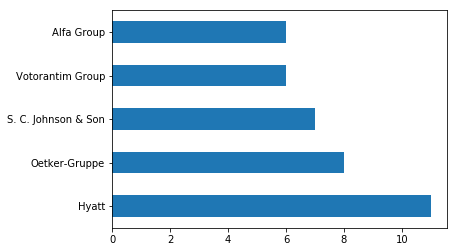

In [26]:
df['company'].value_counts().sort_values(ascending=False).head().plot(kind='barh')

## 8) How much money do these billionaires have in total?

In [27]:
sum(df['networthusbillion'])

6454.4000000000051

## 9) What are the top 3 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is total amount of money per country.

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," and "I want to add it all up." Just chain them all together.

In [28]:
df.groupby('citizenship')['networthusbillion'].sum().sort_values(ascending=False)[:3]

citizenship
United States    2322.4
Russia            422.5
Germany           401.4
Name: networthusbillion, dtype: float64

## 10) How old is an average billionaire? How old are billionaires self made vs. non self made? 

In [29]:
df['age'].mean()

63.342138364779878

In [30]:
df[df['selfmade'] == 'self-made']['age'].mean()

62.625899280575538

In [31]:
df[~(df['selfmade'] == 'self-made')]['age'].mean()

65.008368200836827

## 11) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

In [54]:
df[['name', 'age']].sort_values('age').head()

,name,age
1172,Perenna Kei,24.0
397,Dustin Moskovitz,29.0
1004,Mark Zuckerberg,29.0
127,"Anton Kathrein, Jr.",29.0
394,Drew Houston,30.0


In [55]:
df[['name', 'age']].sort_values('age', ascending=False).head()

,name,age
343,"David Rockefeller, Sr.",98.0
816,Karl Wlaschek,96.0
836,Kirk Kerkorian,96.0
588,Henry Hillman,95.0
435,Erika Pohl-Stroher,95.0


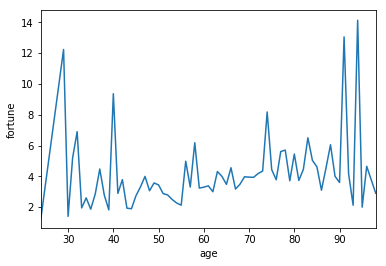

In [98]:
p = df.groupby('age')['networthusbillion'].mean().plot()
p.set_xlabel("age")
p.set_ylabel("fortune")

## 12) Make a scatterplot of their net worth compared to their age

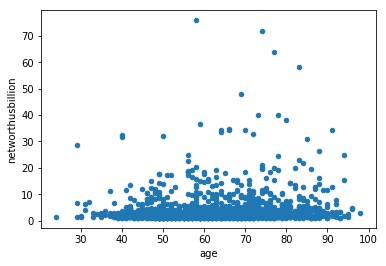

In [42]:
df.plot(kind='scatter', x='age', y='networthusbillion')

## 13) Make a bar graph of the top 10 richest billionaires

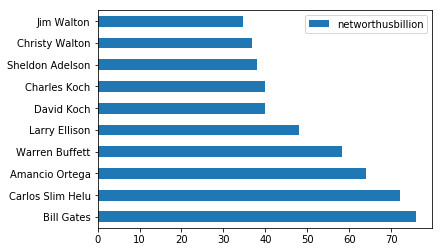

In [41]:
richest = (df[['name', 'networthusbillion']]
 .sort_values('networthusbillion', ascending=False)[:10])
richest.plot(kind='barh').set_yticklabels(richest['name'])